In [1]:
import pandas as pd
import numpy as np

## Common data problems
### Data information and its structure

In [2]:
ride_sharing=pd.read_csv("ride_sharing_fixingDuplicates.csv")

# Print the information of ride_sharing
print(ride_sharing.info())

# Print summary statistics of user_type column
print(ride_sharing['user_type'].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25760 entries, 0 to 25759
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   duration         25760 non-null  object 
 1   station_A_id     25760 non-null  int64  
 2   station_A_name   25760 non-null  object 
 3   station_B_id     25760 non-null  int64  
 4   station_B_name   25760 non-null  object 
 5   bike_id          25760 non-null  int64  
 6   user_type        25760 non-null  object 
 7   user_birth_year  25760 non-null  int64  
 8   user_gender      25760 non-null  object 
 9   tire_sizes       25760 non-null  float64
 10  ride_date        25760 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 2.2+ MB
None
count          25760
unique             2
top       Subscriber
freq           23209
Name: user_type, dtype: object


In [3]:
# Convert user_type from integer to category
ride_sharing['user_type_cat'] = ride_sharing['user_type'].astype("category")

# Write an assert statement confirming the change
assert ride_sharing['user_type_cat'].dtype == 'category'

# Print new summary statistics 
print(ride_sharing['user_type_cat'].describe())

count          25760
unique             2
top       Subscriber
freq           23209
Name: user_type_cat, dtype: object


### Summing strings and concatenating numbers

In [4]:
# Strip duration of minutes
ride_sharing['duration_trim'] = ride_sharing['duration'].str.strip("minutes")

# Convert duration to integer
ride_sharing['duration_time'] = ride_sharing['duration_trim'].astype("int")

# Write an assert statement making sure of conversion
assert ride_sharing['duration_time'].dtype == 'int'

# Print formed columns and calculate average ride duration 
print(ride_sharing[['duration','duration_trim','duration_time']])
print(ride_sharing['duration_time'].mean())

         duration duration_trim  duration_time
0      12 minutes           12              12
1      24 minutes           24              24
2       8 minutes            8               8
3       4 minutes            4               4
4      11 minutes           11              11
...           ...           ...            ...
25755  11 minutes           11              11
25756  10 minutes           10              10
25757  14 minutes           14              14
25758  14 minutes           14              14
25759  29 minutes           29              29

[25760 rows x 3 columns]
11.389052795031056


### Tire size constraint

In [5]:
ride_sharing.info()
# Convert tire_sizes to integer
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('int')

# Set all values above 27 to 27
ride_sharing.loc[ride_sharing['tire_sizes'] > 27, "tire_sizes"] = 27

# Reconvert tire_sizes back to categorical
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('category')

# Print tire size description
print(ride_sharing['tire_sizes'].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25760 entries, 0 to 25759
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   duration         25760 non-null  object  
 1   station_A_id     25760 non-null  int64   
 2   station_A_name   25760 non-null  object  
 3   station_B_id     25760 non-null  int64   
 4   station_B_name   25760 non-null  object  
 5   bike_id          25760 non-null  int64   
 6   user_type        25760 non-null  object  
 7   user_birth_year  25760 non-null  int64   
 8   user_gender      25760 non-null  object  
 9   tire_sizes       25760 non-null  float64 
 10  ride_date        25760 non-null  object  
 11  user_type_cat    25760 non-null  category
 12  duration_trim    25760 non-null  object  
 13  duration_time    25760 non-null  int32   
dtypes: category(1), float64(1), int32(1), int64(4), object(7)
memory usage: 2.5+ MB
count     25760
unique        2
top          27
freq  

In [6]:
import datetime as dt
# Convert ride_date to datetime
ride_sharing['ride_dt'] = pd.to_datetime(ride_sharing['ride_date'])

# Save today's date
today = dt.date.today()
#print(today)

# Set all in the future to today's date
ride_sharing.loc[ride_sharing['ride_dt'].dt.date > today, 'ride_dt'] = today

# Print maximum of ride_dt column
print(ride_sharing['ride_dt'].max())

2022-01-12


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:39: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


### Finding duplicates

In [7]:
ride_sharing_dupl=pd.read_csv("ride_sharing_findingDuplicates.csv")
print(ride_sharing_dupl.head())
# Find duplicates
duplicates = ride_sharing_dupl.duplicated(subset='ride_id', keep=False)

# Sort your duplicated rides
duplicated_rides = ride_sharing_dupl[duplicates].sort_values('ride_id')

# Print relevant columns of duplicated_rides
print(duplicated_rides[['ride_id','duration','user_birth_year']])

   ride_id  duration  station_A_id  \
0        0        11            16   
1        1         8             3   
2        2        11            15   
3        3         7            21   
4        4        11            81   

                                      station_A_name  station_B_id  \
0                            Steuart St at Market St            93   
1       Powell St BART Station (Market St at 4th St)            93   
2  San Francisco Ferry Building (Harry Bridges Pl...            67   
3   Montgomery St BART Station (Market St at 2nd St)            50   
4                                 Berry St at 4th St            21   

                                      station_B_name  bike_id   user_type  \
0                       4th St at Mission Bay Blvd S     5504  Subscriber   
1                       4th St at Mission Bay Blvd S     2915  Subscriber   
2  San Francisco Caltrain Station 2  (Townsend St...     5340    Customer   
3                              2nd St at T

### Treating duplicates

In [8]:
# Drop complete duplicates from ride_sharing
ride_dup = ride_sharing_dupl.drop_duplicates()
#print(ride_dup)

# Create statistics dictionary for aggregation function
statistics = {'user_birth_year': 'min', 'duration': 'mean'}

# Group by ride_id and compute new statistics
ride_unique = ride_dup.groupby('ride_id').agg(statistics).reset_index()

# Find duplicated values again
duplicates = ride_unique.duplicated(subset = 'ride_id', keep = False)
duplicated_rides = ride_unique[duplicates == True]
#print(duplicated_rides)

# Assert duplicates are processed
assert duplicated_rides.shape[0] == 0

## Text and categorical data problems
### Finding consistency

In [9]:
airlines=pd.read_csv("airlines_final.csv")
# Print categories DataFrame
#print(categories)

# Print unique values of survey columns in airlines
print('Cleanliness: ', airlines['cleanliness'].unique(), "\n")
print('Safety: ', airlines['safety'].unique(), "\n")
print('Satisfaction: ', airlines['satisfaction'].unique(), "\n")

Cleanliness:  ['Clean' 'Average' 'Somewhat clean' 'Somewhat dirty' 'Dirty'] 

Safety:  ['Neutral' 'Very safe' 'Somewhat safe' 'Very unsafe' 'Somewhat unsafe'] 

Satisfaction:  ['Very satisfied' 'Neutral' 'Somewhat satsified' 'Somewhat unsatisfied'
 'Very unsatisfied'] 



In [10]:
categories=pd.read_csv("categories.csv")
# Find the cleanliness category in airlines not in categories
cat_clean = set(airlines['cleanliness']).difference(categories['cleanliness'])

# Find rows with that category
cat_clean_rows = airlines['cleanliness'].isin(cat_clean)

# Print rows with inconsistent category
print(airlines[cat_clean_rows])

# Print rows with consistent categories only
print(airlines[~cat_clean_rows])

Empty DataFrame
Columns: [Unnamed: 0, id, day, airline, destination, dest_region, dest_size, boarding_area, dept_time, wait_min, cleanliness, safety, satisfaction]
Index: []
      Unnamed: 0    id        day        airline        destination  \
0              0  1351    Tuesday    UNITED INTL             KANSAI   
1              1   373     Friday         ALASKA  SAN JOSE DEL CABO   
2              2  2820   Thursday          DELTA        LOS ANGELES   
3              3  1157    Tuesday      SOUTHWEST        LOS ANGELES   
4              4  2992  Wednesday       AMERICAN              MIAMI   
...          ...   ...        ...            ...                ...   
2472        2804  1475    Tuesday         ALASKA       NEW YORK-JFK   
2473        2805  2222   Thursday      SOUTHWEST            PHOENIX   
2474        2806  2684     Friday         UNITED            ORLANDO   
2475        2807  2549    Tuesday        JETBLUE         LONG BEACH   
2476        2808  2162   Saturday  CHINA EAST

### Inconsistent categories

In [11]:
# Print unique values of both columns
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

['Asia' 'Canada/Mexico' 'West US' 'East US' 'Midwest US' 'EAST US'
 'Middle East' 'Europe' 'eur' 'Central/South America'
 'Australia/New Zealand' 'middle east']
['Hub' 'Small' '    Hub' 'Medium' 'Large' 'Hub     ' '    Small'
 'Medium     ' '    Medium' 'Small     ' '    Large' 'Large     ']


In [12]:
# Lower dest_region column and then replace "eur" with "europe"
airlines['dest_region'] = airlines['dest_region'].str.lower()
airlines['dest_region'] = airlines['dest_region'].replace({'eur':'europe'})

In [13]:
# Remove white spaces from `dest_size`
airlines['dest_size'] = airlines['dest_size'].str.strip()

# Verify changes have been effected
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

['asia' 'canada/mexico' 'west us' 'east us' 'midwest us' 'middle east'
 'europe' 'central/south america' 'australia/new zealand']
['Hub' 'Small' 'Medium' 'Large']


### Remapping categories

In [14]:
# Create ranges for categories
label_ranges = [0, 60, 180, np.inf]
label_names = ['short', 'medium', 'long']

# Create wait_type column
airlines['wait_type'] = pd.cut(airlines['wait_min'], bins = label_ranges, 
                                labels = label_names)

# Create mappings and replace
mappings = {'Monday':'weekday', 'Tuesday':'weekday', 'Wednesday': 'weekday', 
            'Thursday': 'weekday', 'Friday': 'weekday', 
            'Saturday': 'weekend', 'Sunday': 'weekend'}

airlines['day_week'] = airlines['day'].replace(mappings)
print(airlines['day_week'].unique())
print(airlines['wait_type'].unique())

['weekday' 'weekend']
['medium', 'long', 'short']
Categories (3, object): ['short' < 'medium' < 'long']


### Removing titles and taking names

In [15]:
arilinesWithNames=pd.read_csv("airlines_WithNames.csv")
print(arilinesWithNames.head())
print(arilinesWithNames['full_name'])
# Replace "Dr." with empty string ""
arilinesWithNames['full_name'] = arilinesWithNames['full_name'].str.replace("Dr.","")

# Replace "Mr." with empty string ""
arilinesWithNames['full_name'] = arilinesWithNames['full_name'].str.replace("Mr.","")

# Replace "Miss" with empty string ""
arilinesWithNames['full_name'] = arilinesWithNames['full_name'].str.replace("Miss","")
# Replace "Ms." with empty string ""
arilinesWithNames['full_name'] = arilinesWithNames['full_name'].str.replace("Ms.","")

# Assert that full_name has no honorifics
assert arilinesWithNames['full_name'].str.contains('Ms.|Mr.|Miss|Dr.').any() == False

   Unnamed: 0    id                full_name        day      airline  \
0           0  1351           Melodie Stuart    Tuesday  UNITED INTL   
1           1   373          Dominic Shannon     Friday       ALASKA   
2           2  2820        Quintessa Tillman   Thursday        DELTA   
3           3  1157  Dr. Christine Nicholson    Tuesday    SOUTHWEST   
4           4  2992          Regina Clements  Wednesday     AMERICAN   

         destination    dest_region dest_size boarding_area   dept_time  \
0             KANSAI           Asia       Hub  Gates 91-102  2018-12-31   
1  SAN JOSE DEL CABO  Canada/Mexico     Small   Gates 50-59  2018-12-31   
2        LOS ANGELES        West US       Hub   Gates 40-48  2018-12-31   
3        LOS ANGELES        West US       Hub   Gates 20-39  2018-12-31   
4              MIAMI        East US       Hub   Gates 50-59  2018-12-31   

   wait_min     cleanliness         safety        satisfaction  
0     115.0           Clean        Neutral      Ver

C:\Users\dghr201\AppData\Local\Temp/ipykernel_29804/2139993405.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  arilinesWithNames['full_name'] = arilinesWithNames['full_name'].str.replace("Dr.","")
C:\Users\dghr201\AppData\Local\Temp/ipykernel_29804/2139993405.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  arilinesWithNames['full_name'] = arilinesWithNames['full_name'].str.replace("Mr.","")
C:\Users\dghr201\AppData\Local\Temp/ipykernel_29804/2139993405.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  arilinesWithNames['full_name'] = arilinesWithNames['full_name'].str.replace("Ms.","")


### keeping it descriptive

In [16]:
airlinesWithSurvey=pd.read_csv("airlines_WithSurvey.csv")
# Store length of each row in survey_response column
resp_length = airlinesWithSurvey['survey_response'].str.len()

# Find rows in airlines where resp_length > 40
airlines_survey = airlinesWithSurvey[resp_length > 40]

# Assert minimum survey_response length is > 40
assert airlines_survey['survey_response'].str.len().min() > 40

# Print new survey_response column
print(airlines_survey['survey_response'])

17    The airport personnell forgot to alert us of d...
18    The food in the airport was really really expe...
19    One of the other travelers was really loud and...
20    I don't remember answering the survey with the...
21    The airport personnel kept ignoring my request...
22    The chair I sat in was extremely uncomfortable...
23    I wish you were more like other airports, the ...
24    I was really unsatisfied with the wait times b...
25    The flight was okay, but I didn't really like ...
26    We were really slowed down by security measure...
27    There was a spill on the aisle next to the bat...
28    I felt very unsatisfied by how long the flight...
Name: survey_response, dtype: object


## Advanced data problems

### Uniform currencies

In [17]:
bankingWithCurr=pd.read_csv("banking_WithCurrency.csv")
print(bankingWithCurr.head())
# Find values of acct_cur that are equal to 'euro'
acct_eu = bankingWithCurr['acct_cur'] == 'euro'

# Convert acct_amount where it is in euro to dollars
bankingWithCurr.loc[acct_eu, 'acct_amount'] = bankingWithCurr.loc[acct_eu, 'acct_amount'] * 1.1

# Unify acct_cur column by changing 'euro' values to 'dollar'
bankingWithCurr.loc[acct_eu, 'acct_cur'] = 'dollar'

# Assert that only dollar currency remains
assert bankingWithCurr['acct_cur'].unique() == 'dollar'
print(bankingWithCurr.head())

   Unnamed: 0   cust_id  acct_amount acct_cur  inv_amount account_opened  \
0           0  8C35540A     44244.71   dollar    35500.50       03-05-18   
1           1  D5536652     86506.85   dollar    81921.86       21-01-18   
2           2  A631984D     77799.33   dollar    46412.27       26-01-18   
3           3  93F2F951     93875.24     euro    76563.35       21-08-17   
4           4  DE0A0882     99998.35     euro    18669.01       05-06-17   

  last_transaction  
0         30-09-19  
1         14-01-19  
2         06-10-19  
3         10-07-19  
4         15-01-19  
   Unnamed: 0   cust_id  acct_amount acct_cur  inv_amount account_opened  \
0           0  8C35540A    44244.710   dollar    35500.50       03-05-18   
1           1  D5536652    86506.850   dollar    81921.86       21-01-18   
2           2  A631984D    77799.330   dollar    46412.27       26-01-18   
3           3  93F2F951   103262.764   dollar    76563.35       21-08-17   
4           4  DE0A0882   109998.185 

### Uniform dates

In [18]:
# Print the header of account_opend
print(bankingWithCurr['account_opened'].head())

# Convert account_opened to datetime
bankingWithCurr['account_opened'] = pd.to_datetime(bankingWithCurr['account_opened'],
                                           # Infer datetime format
                                           infer_datetime_format = True,
                                           # Return missing value for error
                                           errors = 'coerce') 

# Get year of account opened
bankingWithCurr['acct_year'] = bankingWithCurr['account_opened'].dt.strftime('%Y')

# Print acct_year
print(bankingWithCurr['acct_year'])

0    03-05-18
1    21-01-18
2    26-01-18
3    21-08-17
4    05-06-17
Name: account_opened, dtype: object
0     2018
1     2018
2     2018
3     2017
4     2017
      ... 
92    2017
93    2018
94    2018
95    2017
96    2017
Name: acct_year, Length: 97, dtype: object


### Verify data integrity

In [19]:
banking=pd.read_csv("banking_dirty.csv")
print(banking.head())
# Store fund columns to sum against
fund_columns = ['fund_A', 'fund_B', 'fund_C', 'fund_D']

# Find rows where fund_columns row sum == inv_amount
inv_equ = banking[fund_columns].sum(axis=1) == banking["inv_amount"]

# Store consistent and inconsistent data
consistent_inv = banking[inv_equ]
inconsistent_inv = banking[~inv_equ]

# Store consistent and inconsistent data
print("Number of inconsistent investments: ", inconsistent_inv.shape[0])

   Unnamed: 0   cust_id  birth_date  Age  acct_amount  inv_amount   fund_A  \
0           0  870A9281  1962-06-09   58     63523.31       51295  30105.0   
1           1  166B05B0  1962-12-16   58     38175.46       15050   4995.0   
2           2  BFC13E88  1990-09-12   34     59863.77       24567  10323.0   
3           3  F2158F66  1985-11-03   35     84132.10       23712   3908.0   
4           4  7A73F334  1990-05-17   30    120512.00       93230  12158.4   

    fund_B   fund_C   fund_D account_opened last_transaction  
0   4138.0   1420.0  15632.0       02-09-18         22-02-19  
1    938.0   6696.0   2421.0       28-02-19         31-10-18  
2   4590.0   8469.0   1185.0       25-04-18         02-04-18  
3    492.0   6482.0  12830.0       07-11-17         08-11-18  
4  51281.0  13434.0  18383.0       14-05-18         19-07-18  
Number of inconsistent investments:  8


In [20]:
print(banking.info())
banking["birth_date"]=pd.to_datetime(banking["birth_date"])
# Store today's date and find ages
today = dt.date.today()
ages_manual = today.year - banking["birth_date"].dt.year

# Find rows where age column == ages_manual
age_equ = ages_manual== banking["Age"]

# Store consistent and inconsistent data
consistent_ages = banking[age_equ]
inconsistent_ages = banking[~age_equ]

# Store consistent and inconsistent data
print("Number of inconsistent ages: ", inconsistent_ages.shape[0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        100 non-null    int64  
 1   cust_id           100 non-null    object 
 2   birth_date        100 non-null    object 
 3   Age               100 non-null    int64  
 4   acct_amount       100 non-null    float64
 5   inv_amount        100 non-null    int64  
 6   fund_A            100 non-null    float64
 7   fund_B            100 non-null    float64
 8   fund_C            100 non-null    float64
 9   fund_D            100 non-null    float64
 10  account_opened    100 non-null    object 
 11  last_transaction  100 non-null    object 
dtypes: float64(5), int64(3), object(4)
memory usage: 9.5+ KB
None
Number of inconsistent ages:  100


### Missing investors

In [21]:
pip install missingno

   Unnamed: 0   cust_id  age  acct_amount  inv_amount account_opened  \
0           0  8C35540A   54     44244.71    35500.50       03-05-18   
1           1  D5536652   36     86506.85    81921.86       21-01-18   
2           2  A631984D   49     77799.33    46412.27       26-01-18   
3           3  93F2F951   56     93875.24    76563.35       21-08-17   
4           4  DE0A0882   21     99998.35         NaN       05-06-17   

  last_transaction  
0         30-09-19  
1         14-01-19  
2         06-10-19  
3         10-07-19  
4         15-01-19  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        97 non-null     int64  
 1   cust_id           97 non-null     object 
 2   age               97 non-null     int64  
 3   acct_amount       97 non-null     float64
 4   inv_amount        84 non-null     float64
 5   accou

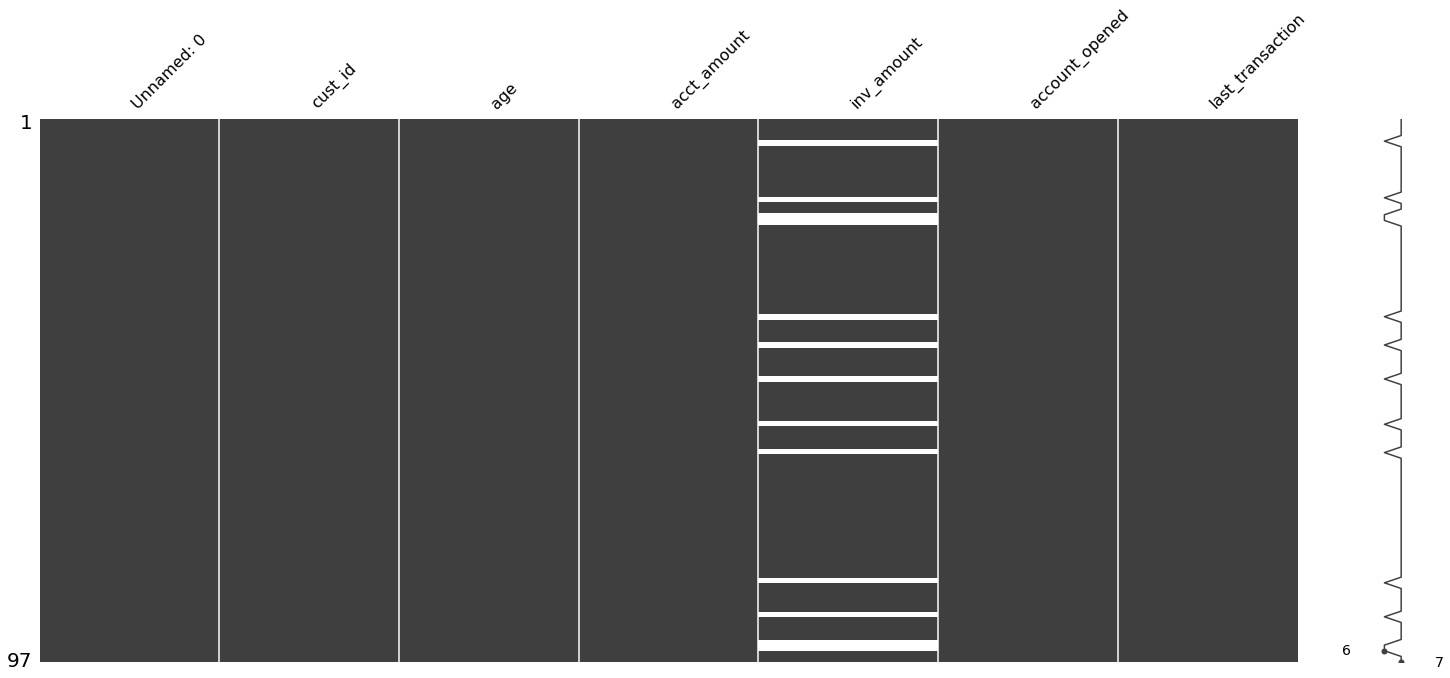

In [22]:
import matplotlib.pyplot as plt
import missingno as msno
bankingMissing=pd.read_csv("banking_Missing.csv")
print(bankingMissing.head())
print(bankingMissing.info())
# Print number of missing values in banking
print(bankingMissing.isna().sum())

# Print number of missing values in banking
print(bankingMissing.isna().sum())

# Visualize missingness matrix
msno.matrix(bankingMissing)
plt.show()

In [23]:
# Isolate missing and non missing values of inv_amount
missing_investors = bankingMissing[bankingMissing["inv_amount"].isna()]
investors = bankingMissing[~bankingMissing["inv_amount"].isna()]

In [24]:
print(investors.describe())
print(missing_investors.describe())

       Unnamed: 0        age    acct_amount    inv_amount
count   84.000000  84.000000      84.000000     84.000000
mean    47.761905  43.559524   75095.273214  44717.885476
std     27.724818  10.411244   32414.506022  26031.246094
min      0.000000  26.000000   12209.840000   3216.720000
25%     24.750000  34.000000   57373.062500  22736.037500
50%     48.500000  45.000000   83061.845000  44498.460000
75%     71.250000  53.000000   94165.965000  66176.802500
max     96.000000  59.000000  250046.760000  93552.690000
       Unnamed: 0        age   acct_amount  inv_amount
count   13.000000  13.000000     13.000000         0.0
mean    49.538462  21.846154  73231.238462         NaN
std     31.902496   1.519109  25553.327176         NaN
min      4.000000  20.000000  21942.370000         NaN
25%     18.000000  21.000000  66947.300000         NaN
50%     46.000000  21.000000  86028.480000         NaN
75%     82.000000  23.000000  89855.980000         NaN
max     94.000000  25.000000  99998.35

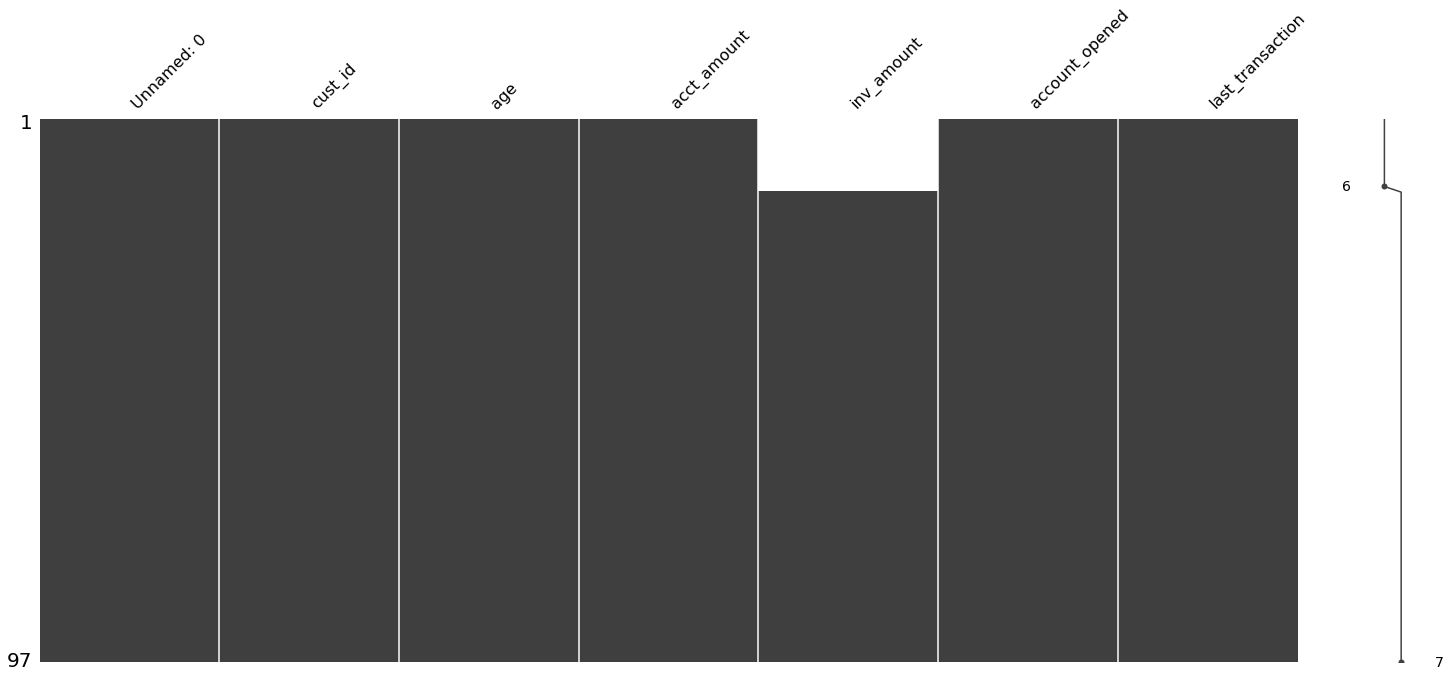

In [25]:
# Sort banking by age and visualize
banking_sorted = bankingMissing.sort_values(by="age")
msno.matrix(banking_sorted)
plt.show()

### Missing pattern

In [26]:
bankingMissing=pd.read_csv("banking_MissingCustIDAndAccntAmnt.csv")
# Drop missing values of cust_id
banking_fullid = bankingMissing.dropna(subset = ['cust_id'])

# Compute estimated acct_amount
acct_imp = banking_fullid["inv_amount"] * 5

# Impute missing acct_amount with corresponding acct_imp
banking_imputed = banking_fullid.fillna({'acct_amount':acct_imp})

# Print number of missing values
print(banking_imputed.isna().sum())

Unnamed: 0          0
cust_id             0
acct_amount         0
inv_amount          0
account_opened      0
last_transaction    0
dtype: int64


## Record linkage

### Similarity using fuzzywuzzy

In [27]:
pip install fuzzywuzzy

In [28]:
restaurants=pd.read_csv("restaurants_L2_dirty.csv")
print(restaurants.head())
print(restaurants.info())
# Import process from fuzzywuzzy
from fuzzywuzzy import process 

# Store the unique values of cuisine_type in unique_types
unique_types = restaurants["type"].unique()

# Calculate similarity of 'asian' to all values of unique_types
print(process.extract('asian', unique_types, limit = len(unique_types)))

# Calculate similarity of 'american' to all values of unique_types
print(process.extract('american', unique_types, limit=len(unique_types)))

# Calculate similarity of 'italian' to all values of unique_types
print(process.extract('italian',unique_types,limit=len(unique_types)))

   Unnamed: 0     name                      addr         city       phone  \
0           0   kokomo         6333 w. third st.           la  2139330773   
1           1   feenix   8358 sunset blvd. west     hollywood  2138486677   
2           2  parkway      510 s. arroyo pkwy .     pasadena  8187951001   
3           3     r-23          923 e. third st.  los angeles  2136877178   
4           4    gumbo         6333 w. third st.           la  2139330358   

           type  
0      american  
1      american  
2   californian  
3      japanese  
4  cajun/creole  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  82 non-null     int64 
 1   name        82 non-null     object
 2   addr        82 non-null     object
 3   city        82 non-null     object
 4   phone       82 non-null     int64 
 5   type        82 non-null     object
dtypes:

C:\ProgramData\Anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


We have determined that the distance cutoff point for remapping typos of 'american', 'asian', and 'italian' cuisine types stored in the cuisine_type column should be 80.

### Remapping categories

In [29]:
categories=['italian', 'asian', 'american']
# Inspect the unique values of the cuisine_type column
print(restaurants['type'].unique())

['american' 'californian' 'japanese' 'cajun/creole' 'hot dogs' 'diners'
 'delis' 'hamburgers' 'seafood' 'italian' 'coffee shops' 'russian'
 'steakhouses' 'mexican/tex-mex' 'noodle shops' 'mexican' 'middle eastern'
 'asian' 'vietnamese' 'health food' 'american ( new )' 'pacific new wave'
 'indonesian' 'eclectic' 'chicken' 'fast food' 'southern/soul' 'coffeebar'
 'continental' 'french ( new )' 'desserts' 'chinese' 'pizza']


In [30]:
# Create a list of matches, comparing 'italian' with the cuisine_type column
matches = process.extract('italian',restaurants['type'],limit=len(restaurants))

# Inspect the first 5 matches
print(matches[0:5])

[('italian', 100, 14), ('italian', 100, 21), ('italian', 100, 47), ('italian', 100, 57), ('italian', 100, 73)]


In [31]:
# Iterate through the list of matches to italian
for match in matches:
  # Check whether the similarity score is greater than or equal to 80
  if match[1] >=80:
    # Select all rows where the cuisine_type is spelled this way, and set them to the correct cuisine
    restaurants.loc[restaurants["type"]==match[0],'type']='italian'

In [32]:
# Iterate through categories
for cuisine in categories:  
  # Create a list of matches, comparing cuisine with the cuisine_type column
  matches = process.extract(cuisine, restaurants['type'], limit=len(restaurants.type))

  # Iterate through the list of matches
  for match in matches:
     # Check whether the similarity score is greater than or equal to 80
    if match[1] >= 80:
      # If it is, select all rows where the cuisine_type is spelled this way, and set them to the correct cuisine
      restaurants.loc[restaurants['type'] == match[0]] = cuisine
      
# Inspect the final result
print(restaurants['type'].unique())

['american' 'californian' 'japanese' 'cajun/creole' 'hot dogs' 'diners'
 'delis' 'hamburgers' 'seafood' 'italian' 'coffee shops' 'russian'
 'steakhouses' 'mexican/tex-mex' 'noodle shops' 'middle eastern' 'asian'
 'vietnamese' 'health food' 'pacific new wave' 'indonesian' 'eclectic'
 'chicken' 'fast food' 'southern/soul' 'coffeebar' 'continental'
 'french ( new )' 'desserts' 'chinese' 'pizza']


In [33]:
print(restaurants.head())
print(restaurants.info())

  Unnamed: 0      name                  addr         city       phone  \
0   american  american              american     american    american   
1   american  american              american     american    american   
2          2   parkway  510 s. arroyo pkwy .     pasadena  8187951001   
3          3      r-23      923 e. third st.  los angeles  2136877178   
4          4     gumbo     6333 w. third st.           la  2139330358   

           type  
0      american  
1      american  
2   californian  
3      japanese  
4  cajun/creole  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  82 non-null     object
 1   name        82 non-null     object
 2   addr        82 non-null     object
 3   city        82 non-null     object
 4   phone       82 non-null     object
 5   type        82 non-null     object
dtypes: object(6)
memory usage:

### Identify pairing in record linkage

In [36]:
pip install recordlinkage

In [38]:
import recordlinkage
restaurants=pd.read_csv("restaurantsNew.csv")
restaurants_new=pd.read_csv("resturantsNewPairing.csv")

# Create an indexer and object and find possible pairs
indexer = recordlinkage.Index()

# Block pairing on cuisine_type
indexer.block("cuisine_type")

# Generate pairs
pairs = indexer.index(restaurants, restaurants_new)

In [39]:
# Create a comparison object
comp_cl = recordlinkage.Compare()

# Find exact matches on city, cuisine_types - 
comp_cl.exact('city', 'city', label='city')
comp_cl.exact('cuisine_type', 'cuisine_type', label='cuisine_type')

# Find similar matches of rest_name
comp_cl.string('rest_name', 'rest_name', label='name', threshold = 0.8) 

# Get potential matches and print
potential_matches = comp_cl.compute(pairs, restaurants, restaurants_new)
print(potential_matches)

        city  cuisine_type  name
0   0      0             1   0.0
    1      0             1   0.0
    7      0             1   0.0
    12     0             1   0.0
    13     0             1   0.0
...      ...           ...   ...
40  18     0             1   0.0
281 18     0             1   0.0
288 18     0             1   0.0
302 18     0             1   0.0
308 18     0             1   0.0

[3631 rows x 3 columns]


In [40]:
# Isolate potential matches with row sum >=3
matches = potential_matches[potential_matches.sum(axis=1) >= 3]

# Get values of second column index of matches
matching_indices = matches.index.get_level_values(1)

# Subset restaurants_new based on non-duplicate values
non_dup = restaurants_new[~restaurants_new.index.isin(matching_indices)]

# Append non_dup to restaurants
full_restaurants = restaurants.append(non_dup)
print(full_restaurants)

    Unnamed: 0                  rest_name                  rest_addr  \
0            0  arnie morton's of chicago   435 s. la cienega blv .    
1            1         art's delicatessen       12224 ventura blvd.    
2            2                  campanile       624 s. la brea ave.    
3            3                      fenix    8358 sunset blvd. west    
4            4         grill on the alley           9560 dayton way    
..         ...                        ...                        ...   
76          76                        don        1136 westwood blvd.   
77          77                      feast        1949 westwood blvd.   
78          78                   mulberry        17040 ventura blvd.   
80          80                    jiraffe      502 santa monica blvd   
81          81                   martha's  22nd street grill 25 22nd   

                 city       phone cuisine_type  
0         los angeles  3102461501     american  
1         studio city  8187621221    